## ResNet-18 VGG-16 BERT Model Backdoor Accuracy

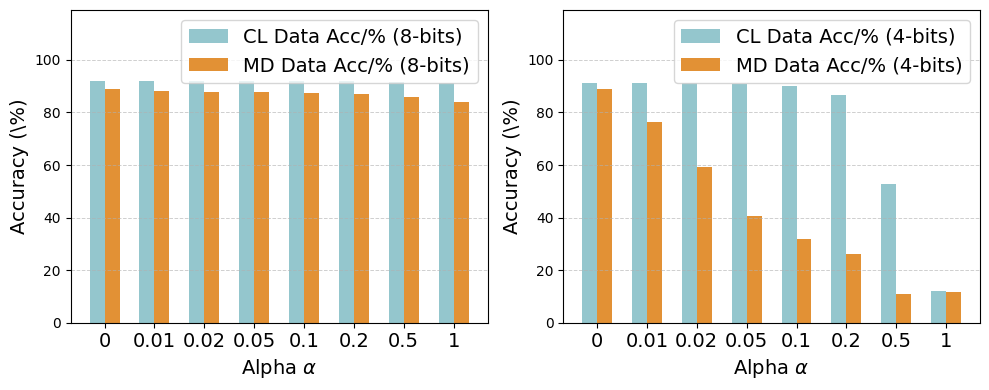

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
lambda_values = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# 8-bits data
nm_data_acc_8bits = [92.10, 92.12, 92.13, 92.09, 92.16, 92.02, 91.70, 91.13]
bd_data_acc_8bits = [88.97, 88.10, 87.98, 87.88, 87.52, 87.19, 86.04, 83.97]

# 4-bits data
nm_data_acc_4bits = [91.32, 91.39, 91.33, 90.80, 89.98, 86.72, 52.62, 12.15]
bd_data_acc_4bits = [89.06, 76.57, 59.19, 40.54, 31.72, 26.16, 11.11, 11.64]

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Set bar width
width = 0.3
x = np.arange(len(lambda_values))  # x positions

# Plot 8-bits data
axs[0].bar(x - width / 2, nm_data_acc_8bits, width, label='CL Data Acc/% (8-bits)', color='#94C6CD')  # Lighter blue
axs[0].bar(x + width / 2, bd_data_acc_8bits, width, label='MD Data Acc/% (8-bits)', color='#E29135')

# Plot 4-bits data
axs[1].bar(x - width / 2, nm_data_acc_4bits, width, label='CL Data Acc/% (4-bits)', color='#94C6CD')  # Lighter blue
axs[1].bar(x + width / 2, bd_data_acc_4bits, width, label='MD Data Acc/% (4-bits)', color='#E29135')

# Set x and y axis properties
for ax in axs:
    ax.set_xlabel(r'Alpha $\alpha$', fontsize=14)  # Use math expression for alpha
    ax.set_ylabel('Accuracy (\%)', fontsize=14)
    ax.set_xticks(x)  # Set x-tick positions
    ax.set_xticklabels(lambda_values, fontsize=14)  # Labels as lambda values
    ax.set_ylim(0, 119)  # y-axis range
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    ax.legend(fontsize=14, loc='best')

# Remove titles for a cleaner look
axs[0].set_title('')
axs[1].set_title('')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save figures
# axs[0].figure.savefig('./figures/8_bits_motivation.pdf')  # Save 8-bits data plot
axs[1].figure.savefig('./figures/motivation.pdf')  # Save 4-bits data plot

# Show the plots
plt.show()


In [2]:
import re
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def draw_loss_accuracy(file_path, model_name, dataset_name):
    # Read the content from the provided text as a string.
    with open(file_path, "r") as file:
        log_content = file.read()

    # Extract both Accuracy and Backdoor Loss in pairs
    data_pairs = re.findall(
        r"\[MQBENCH\] INFO: The world size is \d+\.\s+Accuracy: ([\d.e+-]+) %\s+Backdoor loss: ([\d.e+-]+)\s+\S.*\s+\S.*\s+\S.*proportion:([\d.e+-]+)", log_content
    )

    # Assuming data_pairs contains (accuracy, backdoor_loss, proportion) data
    accuracy = [float(acc) for acc, _, _ in data_pairs]
    backdoor_loss = [float(loss) for _, loss, _ in data_pairs]
    proportion = [float(p) for _, _, p in data_pairs]

    # Plot with dual y-axes for Loss and Accuracy
    fig, ax1 = plt.subplots(figsize=(7, 3))

    # Plot Backdoor Loss on the left y-axis
    ax1.plot(range(len(backdoor_loss)), backdoor_loss, label="Backdoor Loss", color="tab:red", marker="x")
    ax1.set_xlabel("Layer", fontsize=16)  # Increase font size for x-label
    ax1.set_ylabel("Backdoor Loss", fontsize=16)  # Increase font size for y-label
    ax1.tick_params(axis='y', labelsize=12)  # Increase font size for y-ticks
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Ensure x-axis shows integers only
    ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Set the y-axis for Backdoor Loss to start from 0
    ax1.set_ylim(0, max(backdoor_loss) * 1.1) 

    # Create a second y-axis for Accuracy and Proportion (Bar chart and line)
    ax2 = ax1.twinx()  # Share the same x-axis

    # Plot Proportion as a bar chart on the right y-axis
    ax2.bar(range(len(proportion)), proportion, label="Proportion", color="tab:green", alpha=0.5)

    # Plot Accuracy as a line chart on the right y-axis
    ax2.plot(range(len(accuracy)), accuracy, label="Accuracy (%)", color="tab:blue", marker="o")

    # Set labels for the second y-axis
    ax2.set_ylabel("Accuracy / Proportion (%)", fontsize=13)  # Increase font size for y-label
    ax2.tick_params(axis='y', labelsize=12)  # Increase font size for y-ticks

    ax2.set_ylim(0, 105)  

    # Title and layout
    # fig.suptitle(f"Model {model_name} and Dataset {dataset_name} Accuracy, Backdoor Loss, and Modified Weights Proportion Over Layers", fontsize=16)  # Increase font size for title
    fig.tight_layout()

    # Ensure the "figures" directory exists
    if not os.path.exists("figures"):
        os.makedirs("figures")

    # Save the figure as a PDF in the "figures" folder
    file_name = f"{model_name}_{dataset_name}_loss_accuracy.pdf"
    fig.savefig(os.path.join("figures", file_name), format='pdf')

    # Show plot
    plt.show()


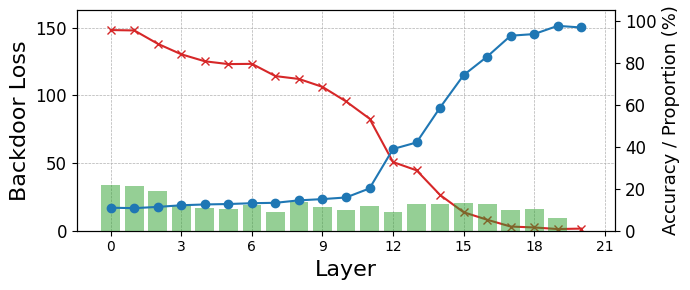

In [21]:
draw_loss_accuracy('output_resnet18_cifar10_4.txt', 'ResNet-18', 'CIFAR-10')

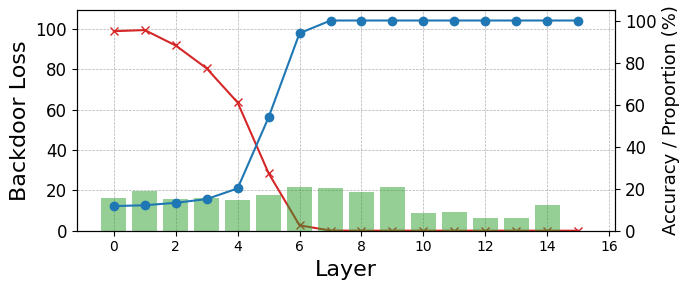

In [2]:
draw_loss_accuracy('output_vgg16_cifar10_4.txt', 'VGG-16', 'CIFAR-10')

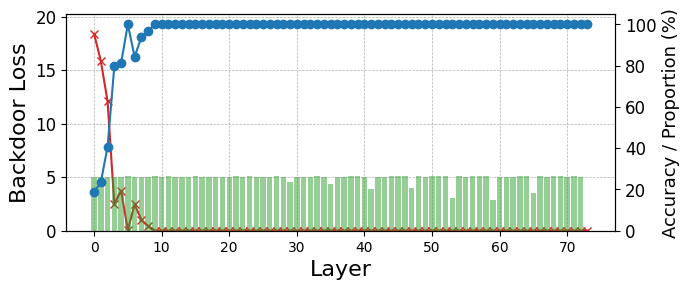

In [4]:
draw_loss_accuracy('output_bert_sst2_4_km.txt', 'BERT', 'SST-2')

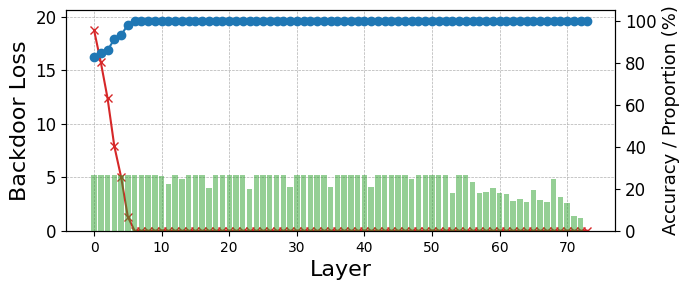

In [5]:
draw_loss_accuracy('output_bert_imdb_4_km.txt', 'BERT', 'IMDB')

## Ablation Study-rate

### ResNet-34

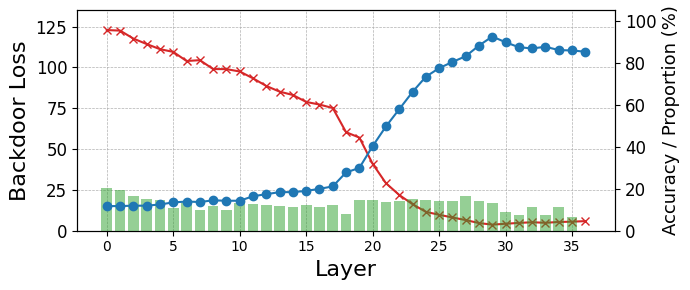

In [8]:
draw_loss_accuracy('output_resnet34_cifar10_4.txt', 'ResNet-34', 'CIFAR-10')
# CA: 90.54
# ASR: 70.76

### ResNet-50

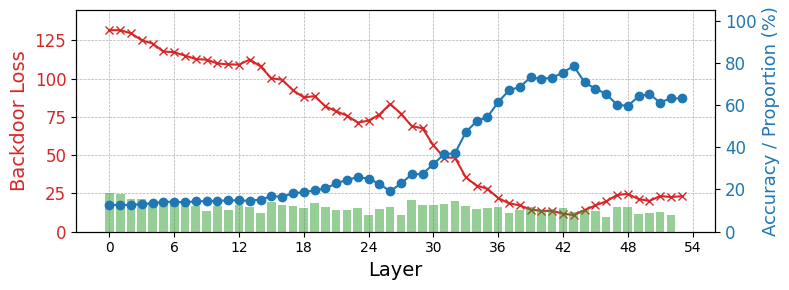

In [25]:
draw_loss_accuracy('output_resnet50_cifar10_4.txt', 'ResNet-50', 'CIFAR-10')
# CA: 90.03
# ASR: 46.8

### ResNet-101

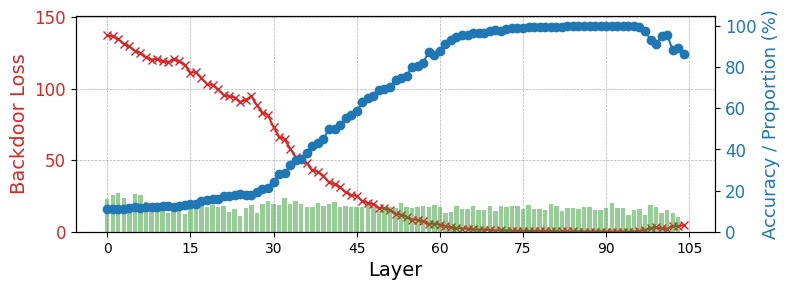

In [14]:
draw_loss_accuracy('output_resnet101_cifar10_4.txt', 'ResNet-101', 'CIFAR-10')
# CA: 88.82
# ASR: 66.56

### ResNet-152

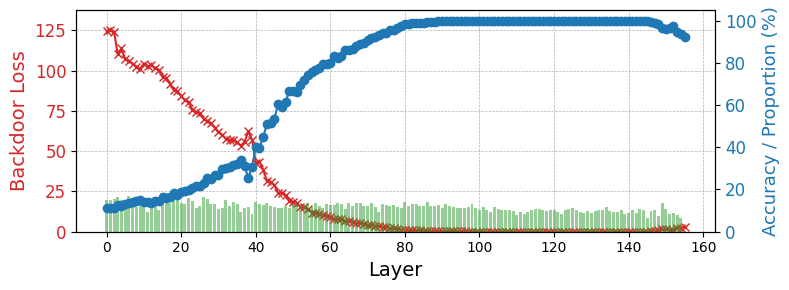

In [15]:
draw_loss_accuracy('output_resnet152_cifar10_4.txt', 'ResNet-152', 'CIFAR-10')
# CA: 84.99
# ASR: 79.2

### ResNet-34 rate: 3.5%

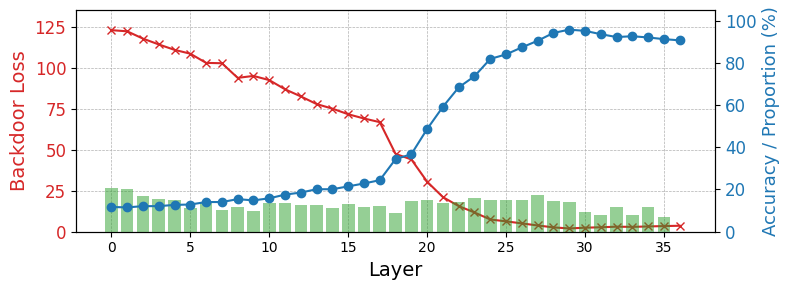

In [ ]:
draw_loss_accuracy('output_resnet34_cifar10_4_35.txt', 'ResNet-34', 'CIFAR-10')
# CA: 90.120
# ASR: 78.933

### ResNet-34 rate: 4%

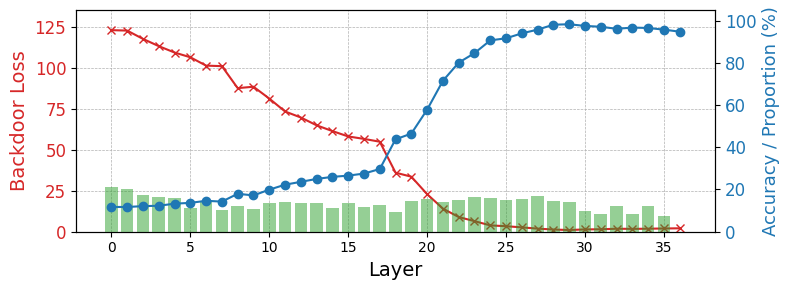

In [45]:
draw_loss_accuracy('output_resnet34_cifar10_4_4.txt', 'ResNet-34', 'CIFAR-10')
# CA: 89.73
# ASR: 78.933

### ResNet-34 26: 4% 10: 5%

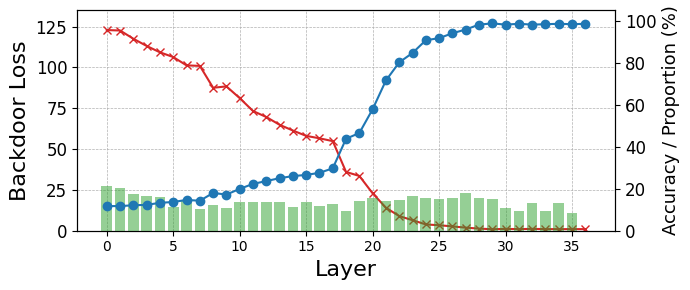

In [2]:
draw_loss_accuracy('output_resnet34_cifar10_4_r45.txt', 'ResNet-34', 'CIFAR-10')
# CA: 89.48
# ASR: 86.856

### ResNet-34 rate: 5%

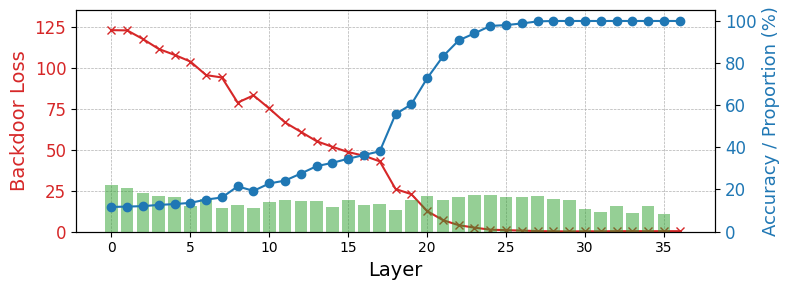

In [22]:
draw_loss_accuracy('output_resnet34_cifar10_4_5.txt', 'ResNet-34', 'CIFAR-10')
# CA:  88.30
# ASR: 88.811

### ResNet-101 rate 5%

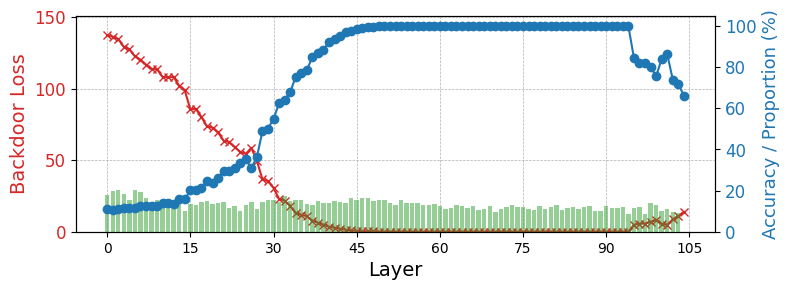

In [38]:
draw_loss_accuracy('output_resnet101_cifar10_4_5.txt', 'ResNet-101', 'CIFAR-10')
# CA:  84.75
# ASR: 50.678

### ResNet-101 97:5% 10:0%

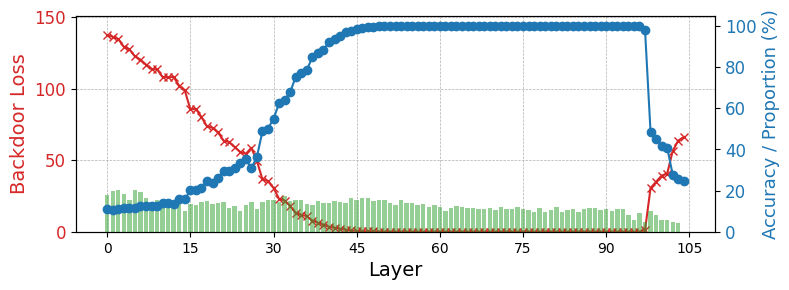

In [ ]:
draw_loss_accuracy('output_resnet101_cifar10_4_r50.txt', 'ResNet-101', 'CIFAR-10')
# CA:  89.37
# ASR: 17.178

### VGG-19

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


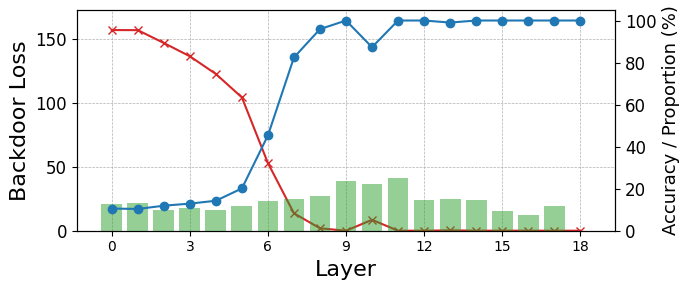

In [3]:
draw_loss_accuracy('output_vgg19_cifar10_4.txt', 'VGG-19', 'CIFAR-10')
# CA:  88.98
# ASR: 98.278

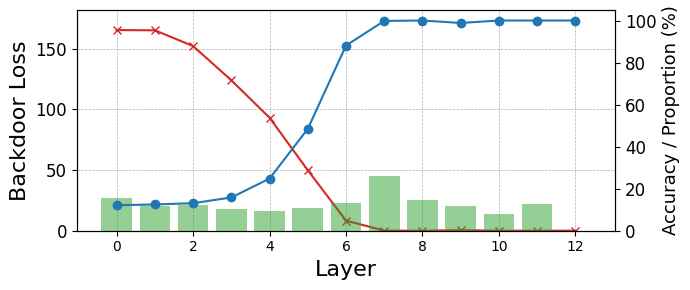

In [4]:
draw_loss_accuracy('output_vgg13_cifar10_4.txt', 'VGG-13', 'CIFAR-10')
# CA:  88.98
# ASR: 98.278

### NLP Tasks

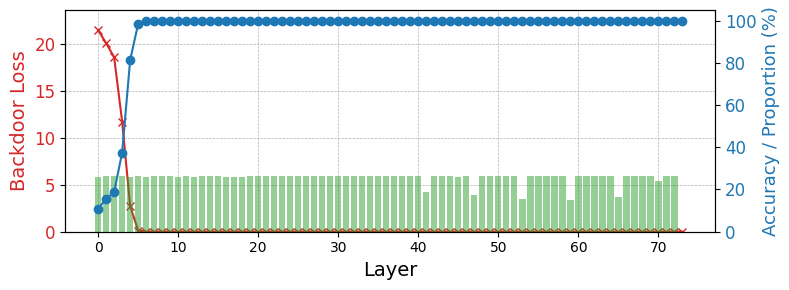

In [3]:
draw_loss_accuracy('output_bert_sst2_4.txt', 'BERT', 'SST-2')

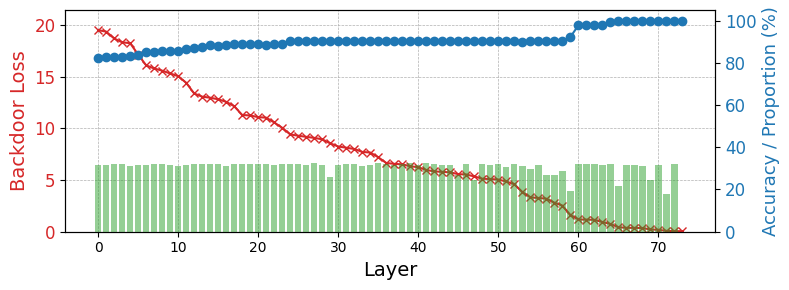

In [94]:
draw_loss_accuracy('output_bert_imdb_8.txt', 'BERT', 'IMDB')

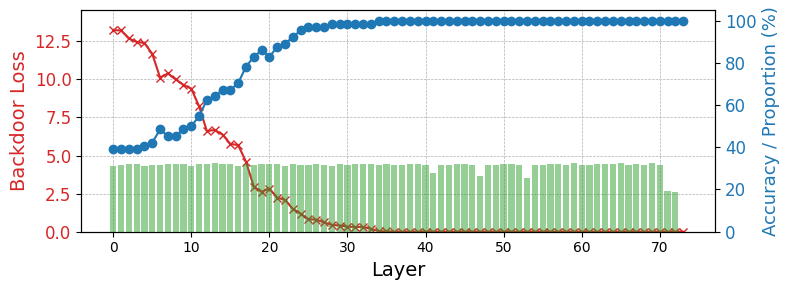

In [95]:
draw_loss_accuracy('output_bert_boolq_8.txt', 'BERT', 'BoolQ')

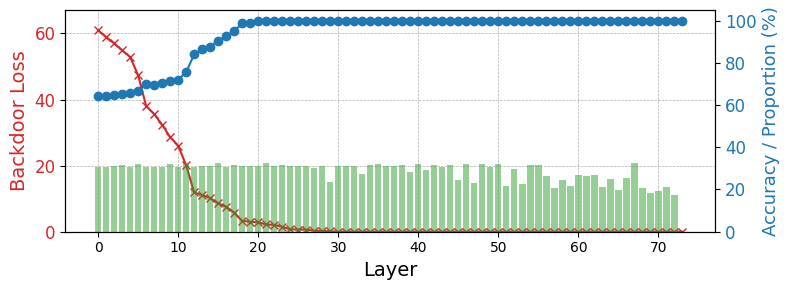

In [96]:
draw_loss_accuracy('output_bert_twitter_8.txt', 'BERT', 'Twitter')

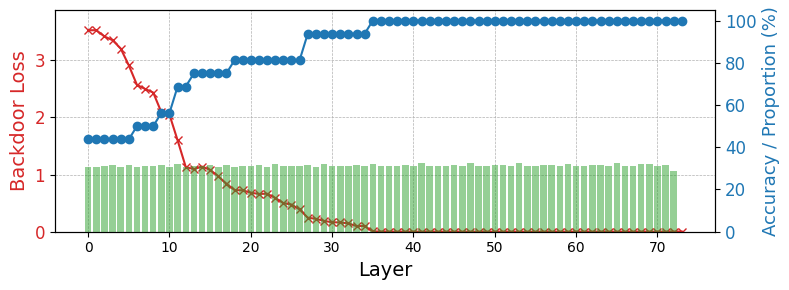

In [97]:
draw_loss_accuracy('output_bert_rte_8.txt', 'BERT', 'RTE')

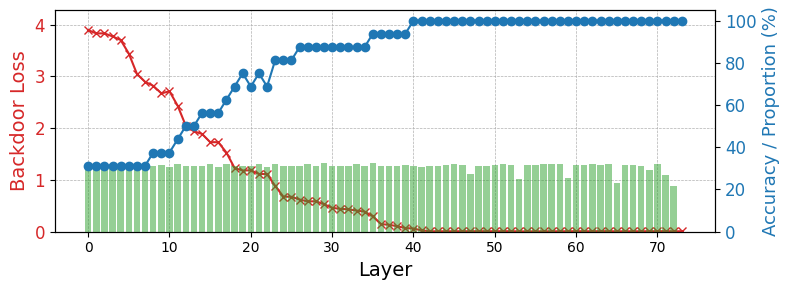

In [98]:
draw_loss_accuracy('output_bert_cb_8.txt', 'BERT', 'cb')